# Performing different types of filter operation on images

C:\Users\roari\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


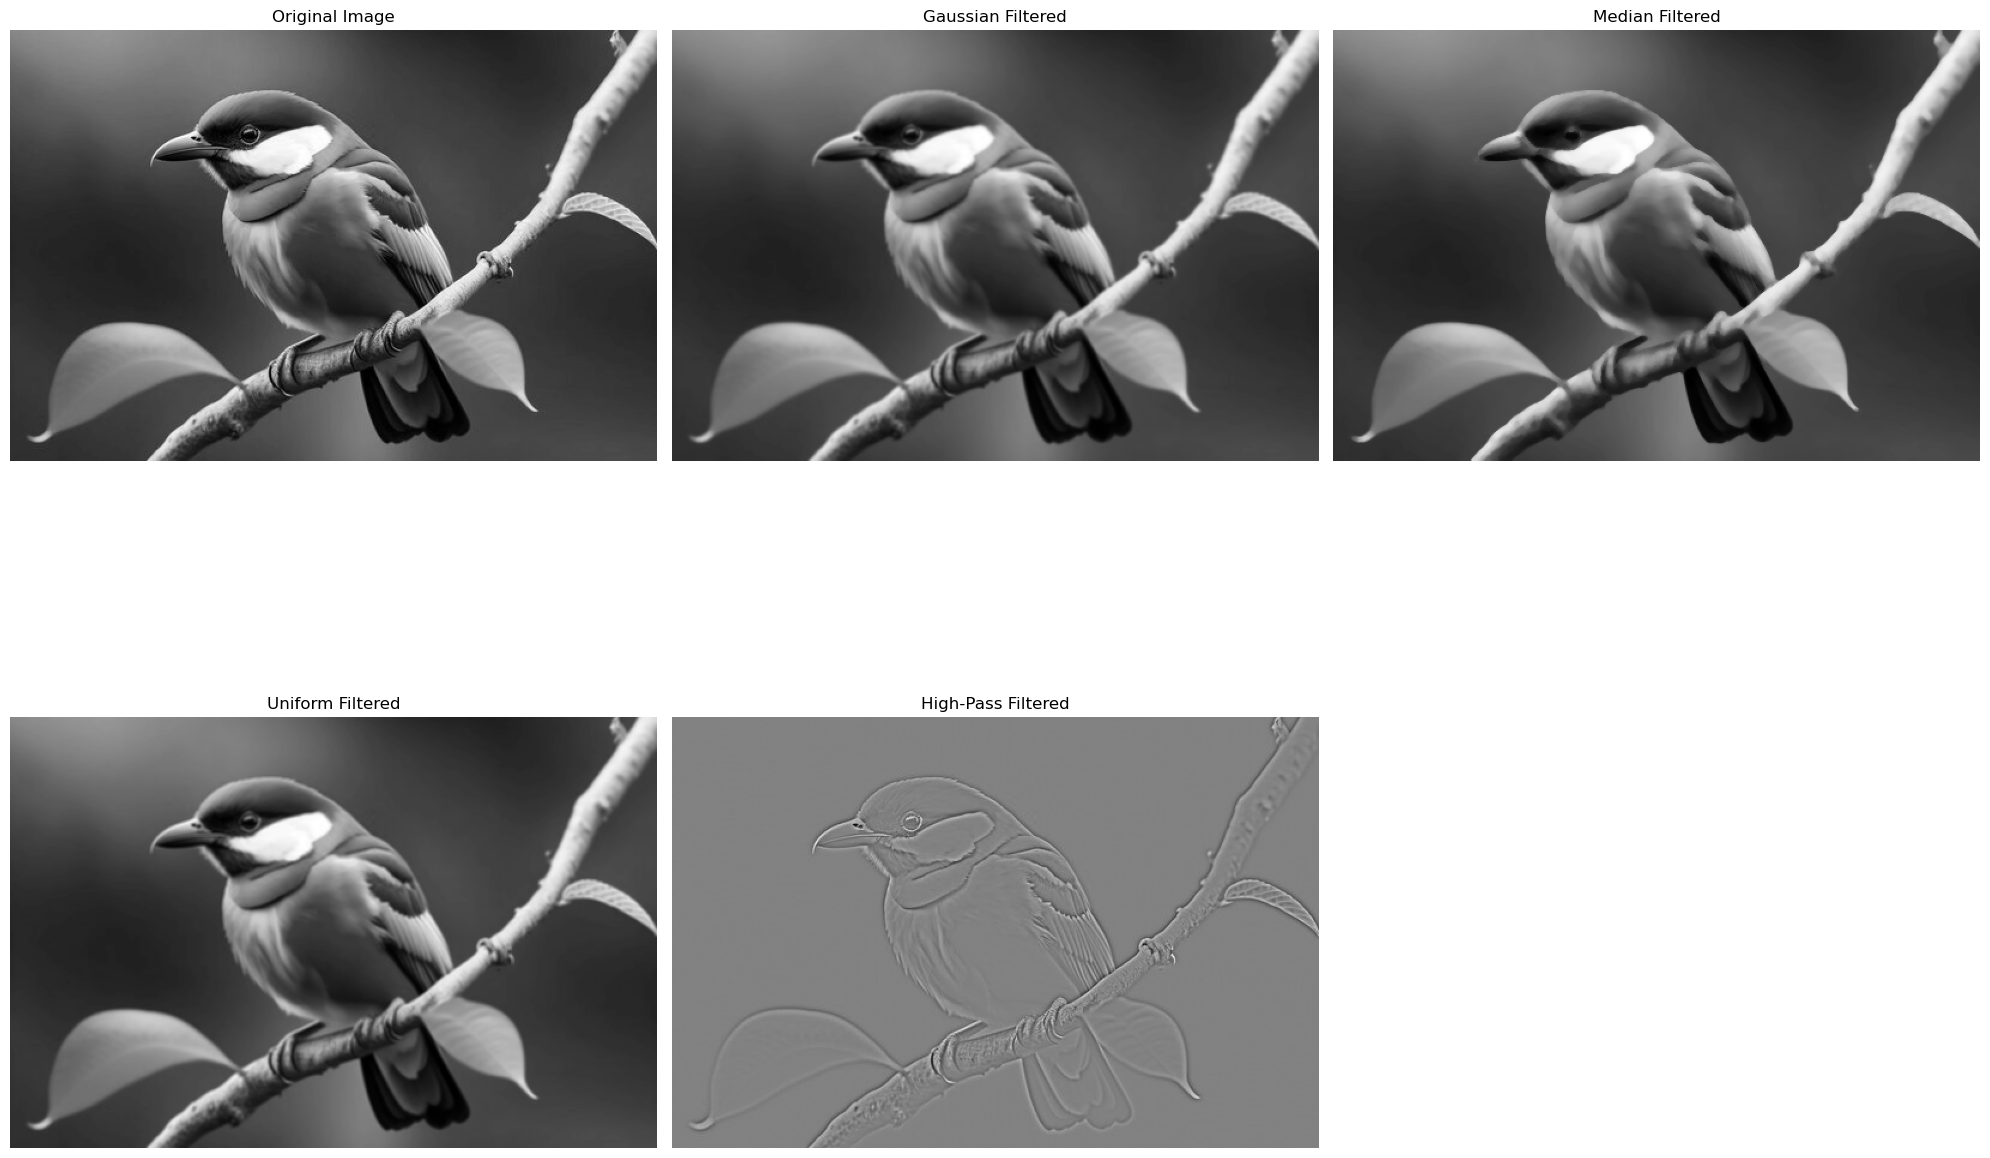

In [3]:
# Import the necessary libraries
from skimage import io, img_as_float
from skimage.filters import gaussian, median
from skimage.morphology import disk
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt

# Load an example image from the specified path
image_path = r"C:\Users\roari\Downloads\bird.jpg"
image = img_as_float(io.imread(image_path, as_gray=True))

"""
Load the image from the specified path and convert it to a float representation.
The image is loaded as a grayscale image using the 'as_gray=True' parameter.
"""

# Apply Gaussian filter (Low-Pass Filter)
gaussian_filtered = gaussian(image, sigma=1)

"""
Apply a Gaussian filter to the image.
The Gaussian filter is a low-pass filter that smooths the image by reducing noise and details.
'sigma' controls the extent of the blurring; a larger sigma means more blurring.
"""

# Apply Median filter
median_filtered = median(image, disk(3))

"""
Apply a Median filter to the image.
The Median filter is a non-linear filter used for noise reduction, particularly effective at removing salt-and-pepper noise.
'disk(3)' specifies the size of the neighborhood for the median calculation (a disk of radius 3).
"""

# Apply Uniform filter (Low-Pass Filter)
uniform_filtered = uniform_filter(image, size=3)

"""
Apply a Uniform filter to the image.
The Uniform filter, also known as a box filter or average filter, smooths the image by averaging the pixels in a specified neighborhood.
'size=3' specifies the size of the square neighborhood.
"""

# Apply High-Pass filter (original - blurred)
blurred_image = gaussian(image, sigma=2)
high_pass_filtered = image - blurred_image

"""
Apply a High-Pass filter to the image by subtracting a blurred version of the image from the original.
The High-Pass filter enhances the edges and details by highlighting the differences between the original image and its blurred version.
'sigma=2' is used for the Gaussian blur, which determines the level of smoothing before subtraction.
"""

# Display the results in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
ax = axes.ravel()

"""
Set up the plotting area with 2 rows and 3 columns of subplots using Matplotlib.
'figsize=(20, 15)' sets the size of the entire figure.
'axes.ravel()' flattens the 2D array of axes into a 1D array for easier indexing.
"""

# Display original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

"""
Display the original image in the first subplot.
'cmap='gray'' ensures the image is displayed in grayscale.
'set_title' sets the title of the subplot.
"""

# Display Gaussian filtered image
ax[1].imshow(gaussian_filtered, cmap='gray')
ax[1].set_title('Gaussian Filtered')

"""
Display the Gaussian filtered image in the second subplot.
"""

# Display Median filtered image
ax[2].imshow(median_filtered, cmap='gray')
ax[2].set_title('Median Filtered')

"""
Display the Median filtered image in the third subplot.
"""

# Display Uniform filtered image
ax[3].imshow(uniform_filtered, cmap='gray')
ax[3].set_title('Uniform Filtered')

"""
Display the Uniform filtered image in the fourth subplot.
"""

# Display High-Pass filtered image
ax[4].imshow(high_pass_filtered, cmap='gray')
ax[4].set_title('High-Pass Filtered')

"""
Display the High-Pass filtered image in the fifth subplot.
"""

# Remove the axis from the 6th subplot (empty)
fig.delaxes(axes[1, 2])

"""
Remove the axis from the sixth subplot since it is not being used.
'delaxes' is used to remove a subplot from the figure.
"""

for a in ax:
    a.axis('off')

"""
Remove the axis ticks and labels from all subplots for a cleaner look.
"""

plt.tight_layout()

"""
Adjust the subplot parameters to give specified padding between plots and display the figure.
'tight_layout()' automatically adjusts subplot parameters to give specified padding.
'show()' renders and displays the plot.
"""
plt.show()

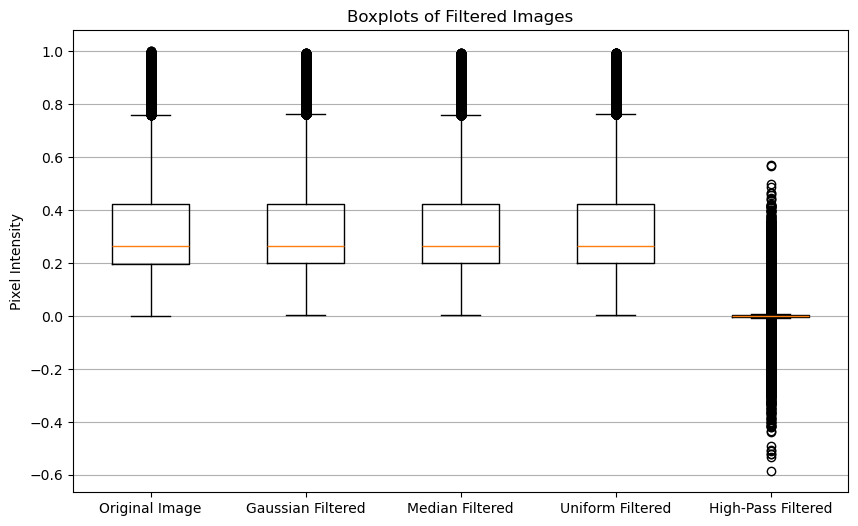

'\nDisplay the boxplot figure.\n'

In [7]:
# Create a smaller boxplot for each image
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.boxplot([img.ravel() for img in images], labels=titles, widths=0.5)  # Set the width of the boxplots

"""
Create a boxplot for each image in the 'images' list.
'ravel()' flattens the 2D image arrays into 1D arrays for boxplotting.
'labels' specifies the titles for each boxplot.
'widths' adjusts the width of the boxplots for a smaller appearance.
"""

plt.title('Boxplots of Filtered Images')
plt.ylabel('Pixel Intensity')
plt.grid(axis='y')

"""
Set the title for the boxplot figure.
'label' sets the label for the y-axis.
'grid' adds a grid along the y-axis for better visibility.
"""

plt.show()

"""
Display the boxplot figure.
"""


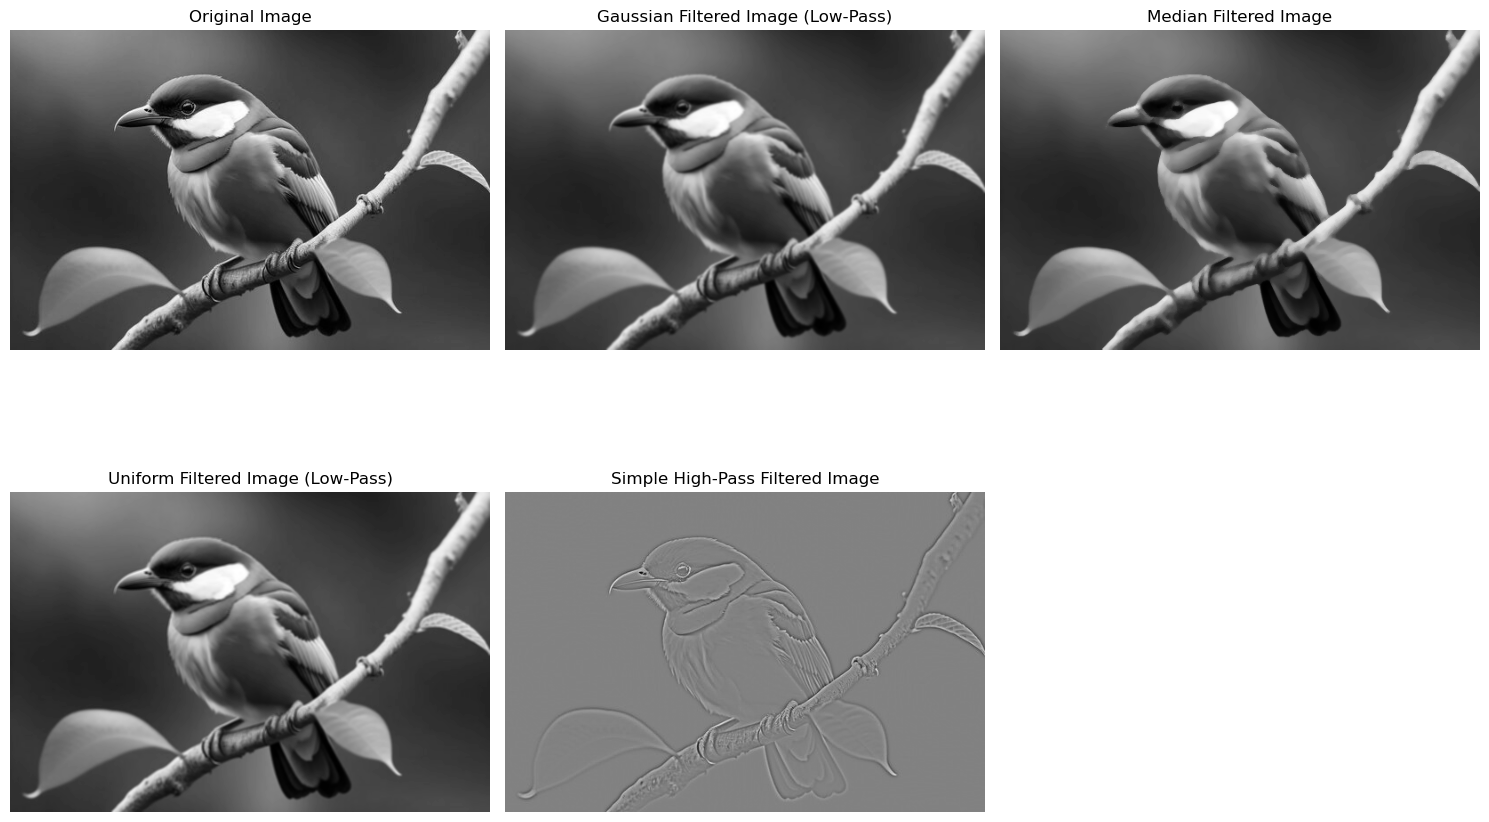

In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.filters import gaussian, median
from skimage.morphology import disk
from scipy.ndimage import uniform_filter

# Load an example image from the specified path
image_path = r"C:\Users\roari\Downloads\bird.jpg"

# Try to load the image from the specified path and handle exceptions if any occur
try:
    image = img_as_float(io.imread(image_path, as_gray=True))
except FileNotFoundError:
    # If the image path is incorrect, print an error message and raise the exception
    print("The specified image path is not found. Please check the path and try again.")
    raise
except Exception as e:
    # If any other exception occurs, print the error and raise the exception
    print(f"An error occurred: {e}")
    raise

# Apply Gaussian filter (Low-Pass Filter)
# This filter smooths the image by reducing high-frequency noise.
gaussian_filtered = gaussian(image, sigma=1)

# Apply Median filter
# This filter is effective for removing salt-and-pepper noise in the image.
median_filtered = median(image, disk(3))

# Apply Uniform filter (Low-Pass Filter)
# This filter also smooths the image by averaging pixel values within a defined window.
uniform_filtered = uniform_filter(image, size=3)

# Apply a simple High-Pass filter (original - blurred)
# This filter highlights the edges in the image by subtracting a blurred version of the image from the original.
blurred_image = gaussian(image, sigma=2)
high_pass_filtered = image - blurred_image

# Plot the original and filtered images
# Set up the figure and display the images with their respective filters
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Gaussian Filtered Image (Low-Pass)')
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Median Filtered Image')
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Uniform Filtered Image (Low-Pass)')
plt.imshow(uniform_filtered, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Simple High-Pass Filtered Image')
plt.imshow(high_pass_filtered, cmap='gray')
plt.axis('off')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()
